In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from utils.dataloader import Dataloader

dataloader = Dataloader(data_dir="data/")

data = dataloader.load_all()
comprehensive_data = data["comprehensive_data"]
covid19_testing_record = data["covid19_testing_record"]
covid19_variants_found = data["covid19_variants_found"]
vaccinations_by_country = data["vaccinations_by_country"]
vaccination_by_manufacturer = data["vaccination_by_manufacturer"]

# Vacciation Manufacturer Distribution

C:\Users\KOSEN\AppData\Local\Temp\ipykernel_24624\150032742.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(all_manufacturers, rotation=90)
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_24624\150032742.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(all_manufacturers, rotation=90)


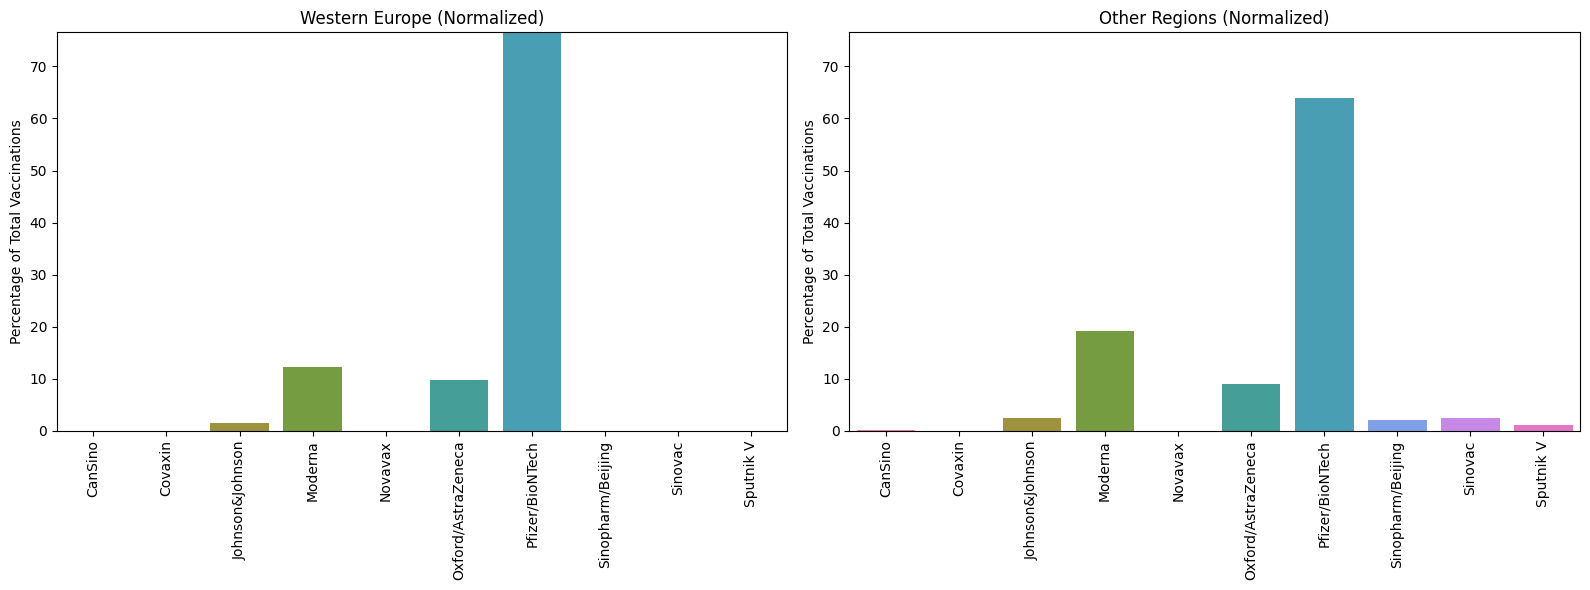

In [3]:
# Calculate total vaccinations for each region
western_data = vaccination_by_manufacturer[vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

other_data = vaccination_by_manufacturer[~vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

all_data = vaccination_by_manufacturer.groupby(
    'manufacturer')['total_vaccinations'].sum()

# Get all unique manufacturers
all_manufacturers = all_data.index.tolist()

# Normalize data by converting to percentages
western_data = (western_data / western_data.sum()) * 100
other_data = (other_data / other_data.sum()) * 100
all_data = (all_data / all_data.sum()) * 100

# Fill missing values with 0 for consistent x-axis
western_data = western_data.reindex(all_manufacturers, fill_value=0)
other_data = other_data.reindex(all_manufacturers, fill_value=0)
all_data = all_data.reindex(all_manufacturers, fill_value=0)

# Define a consistent color palette for manufacturers
color_palette = sns.color_palette("husl", n_colors=len(all_manufacturers))
manufacturer_colors = dict(zip(all_manufacturers, color_palette))

# Create three subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Get the max y value for consistent y-axis scale
max_y = max(western_data.max(), other_data.max(), all_data.max())

# Plot for Western Europe
sns.barplot(x=all_manufacturers, y=western_data.values, ax=ax1,
            hue=all_manufacturers, legend=False,
            palette=[manufacturer_colors[m] for m in all_manufacturers])
ax1.set_title('Western Europe (Normalized)')
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Percentage of Total Vaccinations')
ax1.set_ylim(0, max_y)
ax1.set_xticklabels(all_manufacturers, rotation=90)

# Plot for Other Regions
sns.barplot(x=all_manufacturers, y=other_data.values, ax=ax2,
            hue=all_manufacturers, legend=False,
            palette=[manufacturer_colors[m] for m in all_manufacturers])
ax2.set_title('Other Regions (Normalized)')
ax2.tick_params(axis='x', rotation=90)
ax2.set_ylabel('Percentage of Total Vaccinations')
ax2.set_ylim(0, max_y)
ax2.set_xticklabels(all_manufacturers, rotation=90)

# # Plot for All Regions
# sns.barplot(x=all_manufacturers, y=all_data.values, ax=ax3,
#             hue=all_manufacturers, legend=False,
#             palette=[manufacturer_colors[m] for m in all_manufacturers])
# ax3.set_title('All Regions (Normalized)')
# ax3.tick_params(axis='x', rotation=90)
# ax3.set_ylabel('Percentage of Total Vaccinations')
# ax3.set_ylim(0, max_y)
# ax3.set_xticklabels(all_manufacturers, rotation=90)

plt.tight_layout()
plt.show()

<Figure size 1600x900 with 0 Axes>

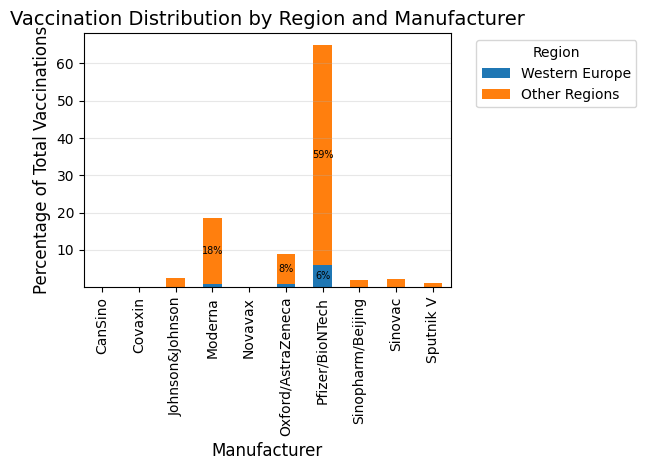

In [4]:
# Calculate total vaccinations for each region
western_data = vaccination_by_manufacturer[vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

other_data = vaccination_by_manufacturer[~vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

all_data = vaccination_by_manufacturer.groupby(
    'manufacturer')['total_vaccinations'].sum()

# Get all unique manufacturers
all_manufacturers = all_data.index.tolist()

# Normalize data by converting to percentages
western_data = (western_data / all_data.sum()) * 100
other_data = (other_data / all_data.sum()) * 100

# Fill missing values with 0 for consistent x-axis
western_data = western_data.reindex(all_manufacturers, fill_value=0)
other_data = other_data.reindex(all_manufacturers, fill_value=0)

# Create a DataFrame for easier plotting
plot_data = pd.DataFrame({
    'Western Europe': western_data,
    'Other Regions': other_data
})

# Create a single figure
plt.figure(figsize=(16, 9))

# Create stacked bar plot
ax = plot_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Vaccination Distribution by Region and Manufacturer', fontsize=14)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Percentage of Total Vaccinations', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for c in ax.containers:
    # Add labels only for values >= 5%
    labels = [f'{v:.0f}%' if v >= 5 else '' for v in [rect.get_height()
                                                      for rect in c]]
    ax.bar_label(c, labels=labels, label_type='center',
                 fontsize=7, color='black')

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

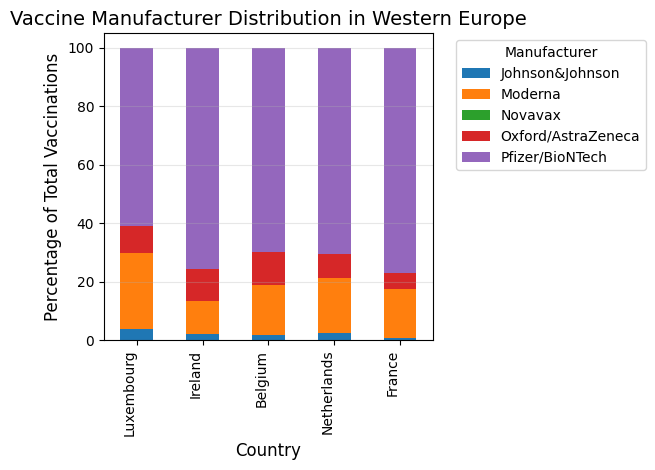

In [5]:
# Get Western European countries and their vaccine distributions
western_data = vaccination_by_manufacturer[vaccination_by_manufacturer['is_western_europe']]

# Get the latest data for each country-manufacturer combination
latest_data = western_data.sort_values(
    'date').groupby(['country', 'manufacturer']).last()
latest_data = latest_data.reset_index()

# Calculate percentage of vaccinations by manufacturer for each country
total_by_country = latest_data.groupby('country')['total_vaccinations'].sum()
latest_data['percentage'] = latest_data.apply(lambda x: (
    x['total_vaccinations'] / total_by_country[x['country']]) * 100, axis=1)

# Create a pivot table for easier plotting
pivot_data = latest_data.pivot(
    index='country', columns='manufacturer', values='percentage').fillna(0)

# Sort countries by total vaccinations
country_order = latest_data.groupby(
    'country')['total_vaccinations'].sum().sort_values(ascending=True).index

# Plot the distribution
plt.figure(figsize=(15, 10))
pivot_data.reindex(country_order).plot(kind='bar', stacked=True)

plt.title('Vaccine Manufacturer Distribution in Western Europe', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage of Total Vaccinations', fontsize=12)
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, ha='right')

# Add grid lines for better readability
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()